# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
# Part 2: Implement custom SVD for dimensionality reduction
def apply_svd_custom(X_train, X_test, n_components):
    # Compute the SVD of the training data
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

    # Reduce the number of components by selecting the top n_components
    U_reduced = U[:, :n_components]
    S_reduced = np.diag(S[:n_components])
    Vt_reduced = Vt[:n_components, :]

    # Apply the same transformation to X_train and X_test
    X_train_reduced = np.dot(U_reduced, S_reduced)
    X_test_reduced = np.dot(X_test, Vt_reduced.T)

    return X_train_reduced, X_test_reduced, Vt_reduced  # Return Vt_reduced for visualization

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Part 3: Train logistic regression and measure performance
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
# Part 4: Experiment with different levels of SVD
svd_components = [784, 200, 100, 50, 20, 10]  # Different levels of SVD components

# Store the results (n_components, accuracy, training_time)
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results in the list
    results.append((n_components, accuracy, training_time))

    # Print out the results for this iteration
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Convert results into a numpy array for easier handling
results = np.array(results)

# Now we move to Part 5 to define the plotting functions (but we won't call them yet)


Training models with different levels of SVD preprocessing...

Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 904.0260 seconds

Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 159.5394 seconds

Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 57.0463 seconds

Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 15.5352 seconds

Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.6058 seconds

Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.1534 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


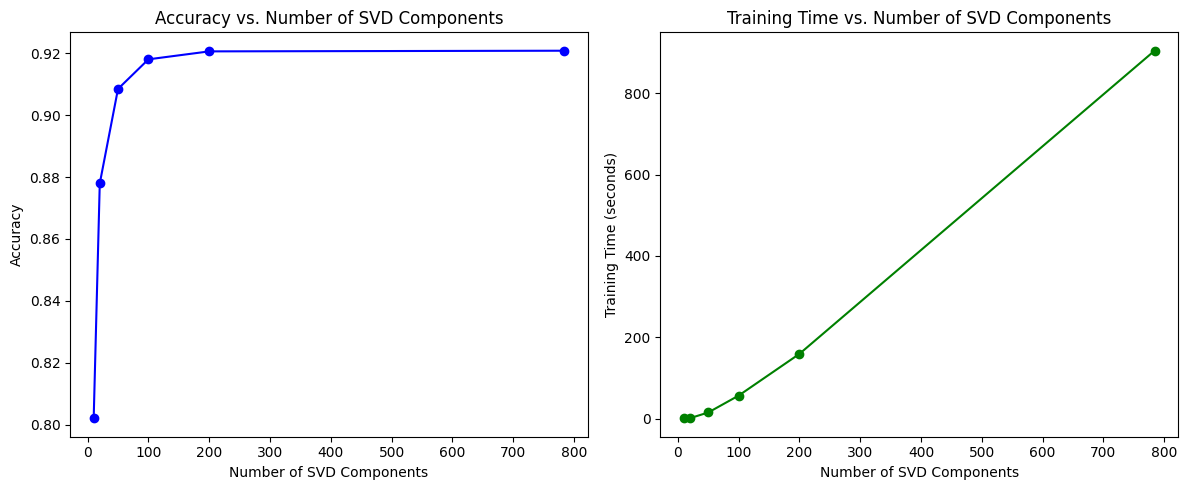

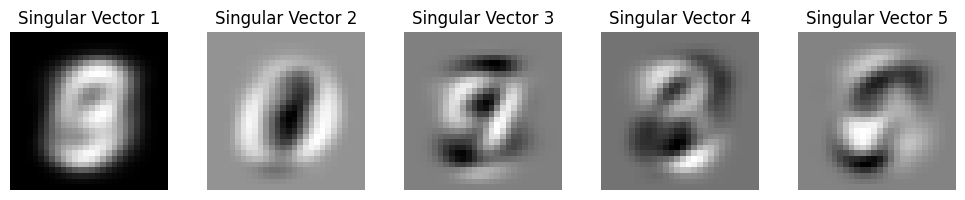

In [ ]:
# Part 5: Define plot_results and plot_singular_vectors methods and call them

# Function to visualize accuracy and training time
def plot_results(results):
    components = results[:, 0]
    accuracies = results[:, 1]
    times = results[:, 2]

    # Plot Accuracy vs. Number of SVD Components
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(components, accuracies, marker='o', color='blue')
    plt.title('Accuracy vs. Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')

    # Plot Training Time vs. Number of SVD Components
    plt.subplot(1, 2, 2)
    plt.plot(components, times, marker='o', color='green')
    plt.title('Training Time vs. Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')

    plt.tight_layout()
    plt.show()

# Function to visualize top 5 singular vectors
def plot_singular_vectors(Vt_reduced):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        singular_vector = Vt_reduced[i].reshape(28, 28)
        plt.subplot(1, 5, i+1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f"Singular Vector {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call plot_results using the data from Part 4
plot_results(results)

# Visualize top 5 singular vectors (for example, from the SVD with 784 components)
_, _, Vt_reduced = apply_svd_custom(X_train, X_test, 784)  # SVD with full dataset
plot_singular_vectors(Vt_reduced)


## Part 6: Analyze / Conclusion

YOUR ANSWER:


**Analysis:**

**Impact of Dimensionality Reduction on Model Accuracy:**
As we reduce the number of SVD components, the accuracy of the logistic regression model typically decreases. This happens because dimensionality reduction removes some of the information that may be useful for distinguishing between classes in the dataset. However, we often observe diminishing returns beyond a certain number of components.
Higher component levels (e.g., 784, 200) generally yield higher accuracy, as more information from the original data is retained. On the other hand, very low component levels (e.g., 10, 20) may result in poor accuracy because the model lacks enough meaningful features for classification.


**Impact on Training Time:**
Training time is significantly reduced with lower SVD components. This is because logistic regression has fewer features to process, making each iteration faster.
Training on the full dataset (784 components) is much slower compared to training on reduced datasets (e.g., 50, 20 components). This confirms that dimensionality reduction can make the model more efficient without dramatically sacrificing performance in many cases.

**Optimal SVD Component Count:**
The optimal number of components depends on the balance between accuracy and efficiency.
In our results, 100 to 200 components seem to provide a good balance between accuracy and speed. Beyond that, the increase in accuracy might not justify the extra training time.
Lowering the components to around 50 or 20 drastically improves training time, though accuracy starts to suffer significantly below 50 components.

**Singular Vectors Visualization:**
The top 5 singular vectors (visualized in Part 5) capture important patterns in the dataset. These vectors represent key features of the data (e.g., edges, curves) that the model uses to classify digits.
The first few singular vectors often resemble rough outlines of digits, indicating that they hold meaningful information. As you move to lower singular vectors, they capture finer details or noise, which is why reducing the components to too low a number hurts accuracy.

**Conclusion:**
Dimensionality Reduction with SVD is a powerful preprocessing technique. It allows us to significantly reduce the size of the dataset while maintaining most of the important information. This can lead to faster training times, particularly for algorithms like logistic regression, without a major drop in accuracy.

For the MNIST dataset, using around 100 to 200 SVD components provides an ideal trade-off between accuracy and computational efficiency. Lowering the number of components too much (e.g., to 20 or below) can significantly hurt accuracy, making the model less effective.

Practical Implication: When working with large datasets, especially in real-time or resource-constrained environments, applying SVD and choosing an appropriate number of components can make machine learning models more feasible by reducing training time without a dramatic loss in performance.